In [1]:
from measurement import get_DYG14, get_DYG15, set_camera, set_background

   
# https://myhdf5.hdfgroup.org
save_image_location = "/home/awa/awa_data/01-16_6DReconstruction/reconstruction_scan/"
DYG14 = get_DYG14()
DYG15 = get_DYG15()

# stop windoing on charge
DYG14.target_charge = None
DYG15.target_charge = None

DYG14.save_image_location = save_image_location
DYG15.save_image_location = save_image_location


setting camera DYG14


CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArrayData", Connecting to: 146.139.52.185:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Thu Jan 18 2024 10:11:24.588869142
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArraySize0_RBV", Connecting to: 146.139.52.185:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Thu Jan 18 2024 10:11:24.589482862
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArraySize1_RBV", Connecting to: 146.139.52.185:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Thu Jan 18 2024 10:11:24.589565907
................................................................

192.168.2.111
ip address already set
starting acquisition
please shutter beam


please un-shutter beam


background file: /home/awa/awa_data/01-16_6DReconstruction/reconstruction_scan/DYG14_background.npy
displaying image
fitting image


AWAEPICSImageDiagnostic(screen_name='13ARV1', ip_address='192.168.2.111', alias='DYG14', array_data_suffix='image1:ArrayData', array_n_cols_suffix='image1:ArraySize0_RBV', array_n_rows_suffix='image1:ArraySize1_RBV', resolution_suffix=None, resolution=1.0, beam_shutter_pv=None, extra_pvs=[], background_file='/home/awa/awa_data/01-16_6DReconstruction/reconstruction_scan/DYG14_background.npy', save_image_location='/home/awa/awa_data/01-16_6DReconstruction/reconstruction_scan/', roi=ROI(xcenter=556, ycenter=806, xwidth=700, ywidth=700), gain=5.0, min_log_intensity=4.0, bounding_box_half_width=3.0, wait_time=1.0, n_fitting_restarts=1, visualize=True, verbose=True, return_statistics=False, threshold=0.0, target_charge=None, target_charge_pv='AWAVXI11ICT:Ch4', charge_atol=1e-10, testing=False)

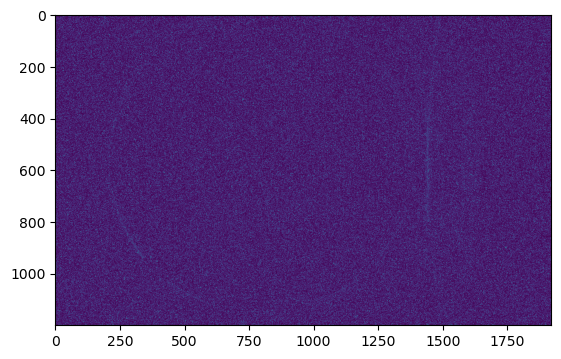

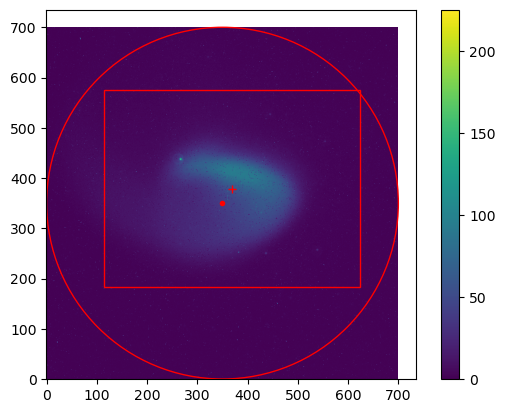

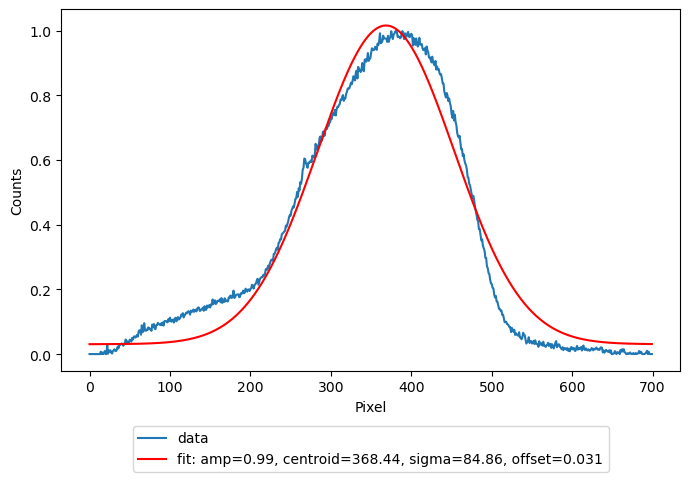

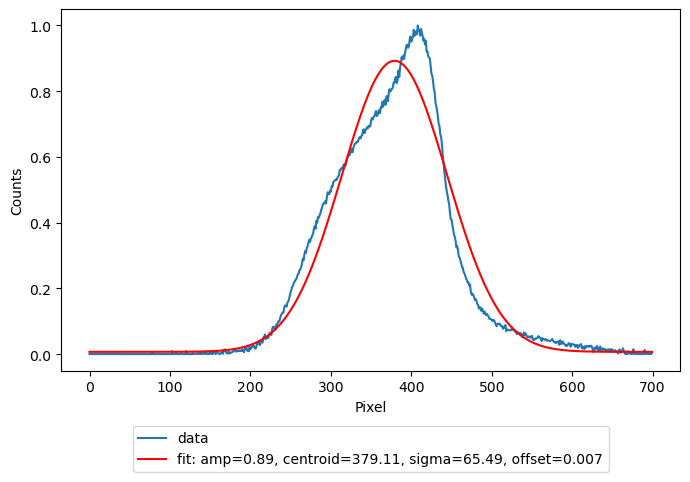

In [2]:
set_background(DYG14)
#set_background(DYG15)

#set_background(DYG15)

setting camera DYG14
192.168.2.111
ip address already set
starting acquisition
displaying image
fitting image


{'Cx': 372.15881362451813,
 'Cy': 374.7325819900433,
 'Sx': 7.116478347682095,
 'Sy': 13.938592319687569,
 'bb_penalty': -270.49118425647583,
 'total_intensity': 1807392896.0,
 'log10_total_intensity': 9.257052570943406,
 'AWAVXI11ICT:Ch4': 2.4552202567401913e-09}

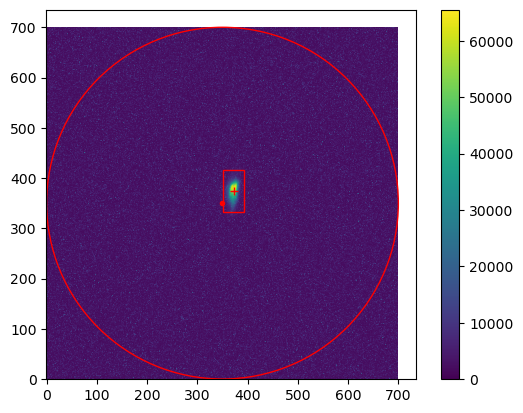

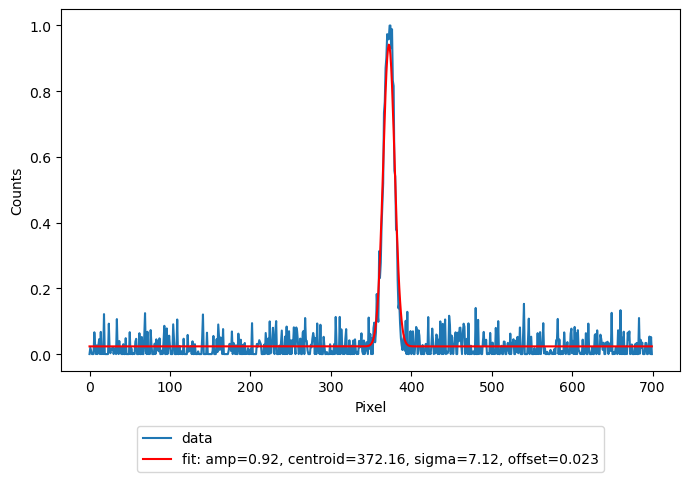

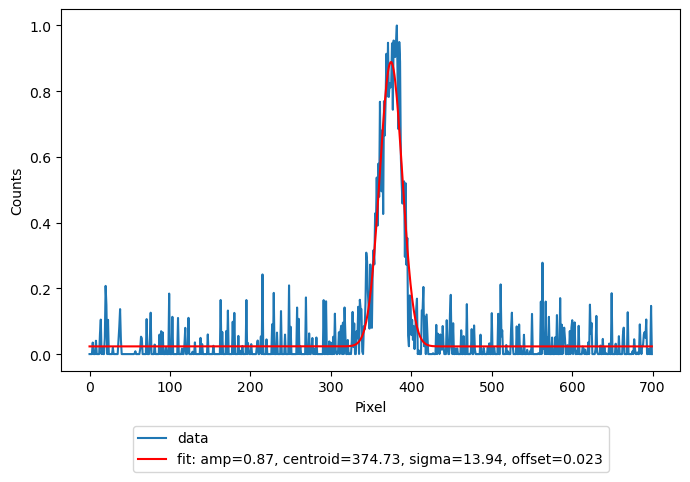

In [12]:
set_camera(DYG14)
DYG14.test_measurement()

setting camera DYG15
192.168.2.139
ip address already set
starting acquisition
displaying image
fitting image


{'Cx': nan,
 'Cy': nan,
 'Sx': nan,
 'Sy': nan,
 'bb_penalty': 740.7005867333528,
 'total_intensity': 1114134800.0,
 'log10_total_intensity': 9.04693773962985,
 'AWAVXI11ICT:Ch4': 2.371728135185464e-09}

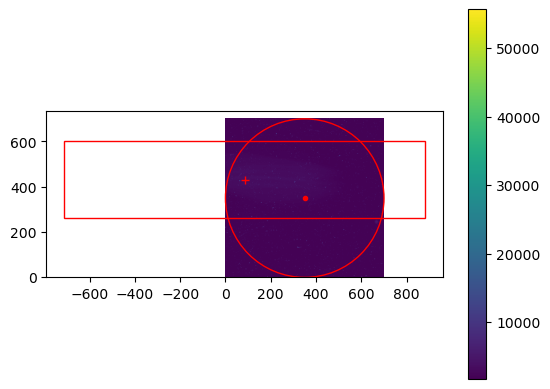

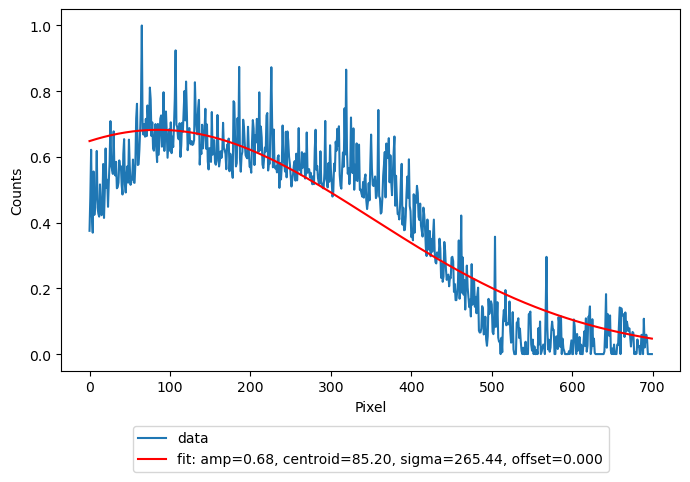

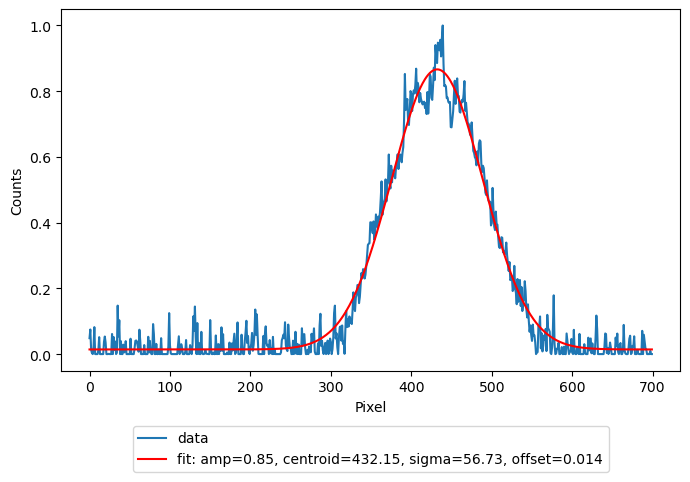

CA.Client.Exception...............................................
    Context: "awa5:5064"
    Source File: ../cac.cpp line 1237
    Current Time: Wed Jan 17 2024 10:58:26.049204500
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArrayData", Connecting to: 146.139.52.185:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Wed Jan 17 2024 10:59:25.153460041
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArraySize0_RBV", Connecting to: 146.139.52.185:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Wed Jan 17 2024 10:59:25.153602577
..................................................................
CA.Client.Exception...............................................
    Context: "Ch

In [14]:
set_camera(DYG15)
DYG15.test_measurement()

In [5]:
image = DYG15.get_processed_image()
import matplotlib.pyplot as plt
image

(array([[1984., 1936., 2144., ..., 2144., 2000., 2064.],
        [2112., 2496., 2752., ..., 1888., 2064., 1952.],
        [1968., 2480., 6640., ..., 2016., 2016., 2048.],
        ...,
        [1968., 1888., 1872., ..., 1936., 1936., 1872.],
        [2128., 1968., 2976., ..., 1920., 1792., 1792.],
        [1952., 1952., 2960., ..., 2000., 1936., 1936.]]),
 {'AWAVXI11ICT:Ch4': 4.501782295965131e-10})

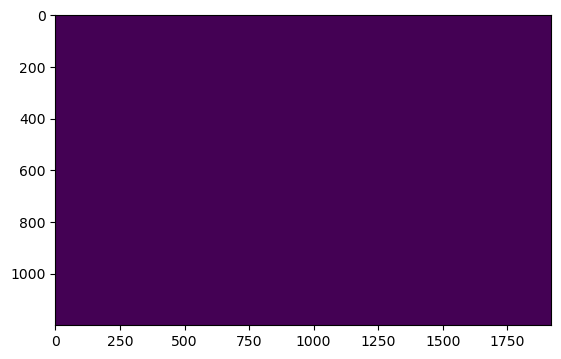

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.load("/home/awa/awa_data/01-16_6DReconstruction/DYG14_background.npy")>0)